# Hotel Rating Classification
##### In this project, our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel. Our major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

### Importing libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import neattext.functions as nfx

In [3]:
df = pd.read_excel('hotel_reviews.xlsx')

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


### Data Visualization

<AxesSubplot:xlabel='Rating', ylabel='count'>

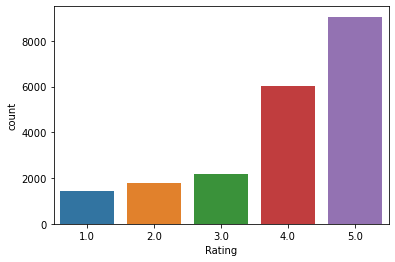

In [5]:
sns.countplot(x="Rating", data=df)

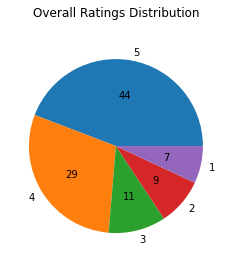

In [6]:
import matplotlib.pyplot as plt
plt.pie(df['Rating'].value_counts(),autopct='%0.0f', labels=['5', '4', '3', '2', '1'])
plt.title('Overall Ratings Distribution\n')
plt.show()


### Data Preprocessing & Cleaning

1) Cleaning of unstructured text data
2) Reduce noise (special characters,stopwords)
3) Reducing repetition of using the same code for text preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [8]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
dir(nfx)
df['clean_txt']=df["Review"].apply(nfx.remove_userhandles)
df['clean_txt']=df['clean_txt'].apply(nfx.remove_stopwords)
df

,Review,Rating,clean_txt
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms 4* experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",5.0,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5.0,"great stay great stay, went seahawk game aweso..."
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,"best kept secret 3rd time staying charm, 5-sta..."
20487,great location price view hotel great quick pl...,4.0,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2.0,"ok looks nice modern outside, desk staff n't p..."
20489,hotel theft ruined vacation hotel opened sept ...,1.0,hotel theft ruined vacation hotel opened sept ...


### Creating a wordcloud

In [11]:
from textblob import TextBlob
from wordcloud import WordCloud

In [12]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
                        
    plt.figure(figsize = (6, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 


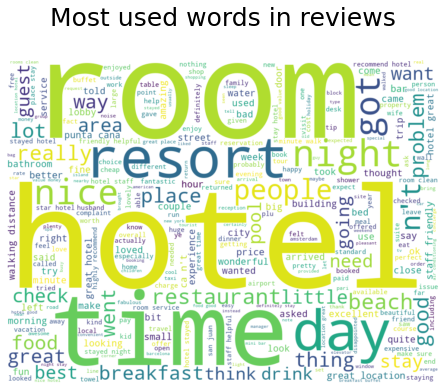

In [13]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=df['Review'], title="Most used words in reviews\n")

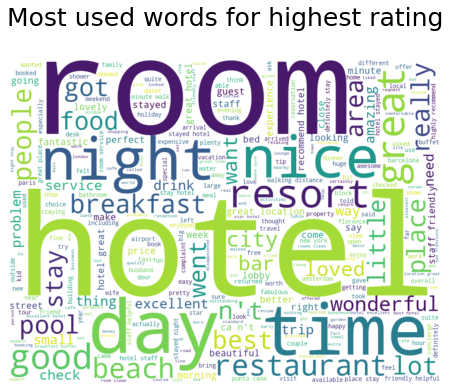

In [14]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(data=df[df['Rating']==5]['Review'], title="Most used words for highest rating\n")


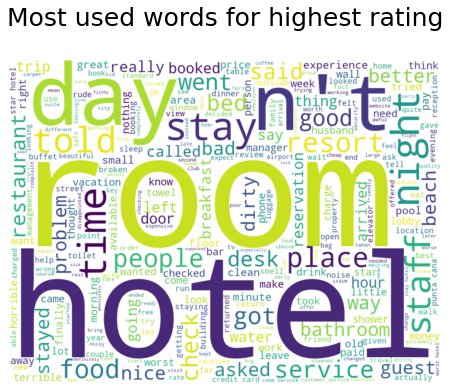

In [15]:
#Plotting the wordcloud on original data for all Lowest rating (==1)
wordCloud_generator(data=df[df['Rating']==1]['Review'], title="Most used words for highest rating\n")


### Feature selection

In [16]:
x=df['clean_txt']
x

0        nice hotel expensive parking got good deal sta...
1        ok special charge diamond member hilton decide...
2        nice rooms 4* experience hotel monaco seattle ...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, 5-sta...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside, desk staff n't p...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, n't believe excellent ratings ...
Name: clean_txt, Length: 20491, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 3000)
tv_x = tv.fit_transform(x).toarray()


In [18]:
tv_x.shape

(20491, 3000)

### We will classify all reviews:
### with Rating== 1 or 2 or 3 as overall ->> '0'.
### with Sentiment == 4 or5 as overall ->> '1'.

In [20]:
classification = df["Rating"].apply(lambda rating : 1 if rating == 4.0 or 5.0 else 0)

In [21]:
y=[]
for i in df["Rating"]:
  if i == 4.0 or i == 5.0 :
    y.append(1)
  else:
    y.append(0)
df["rate"]= y

In [22]:
df.head()

,Review,Rating,clean_txt,rate
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,2.0,ok special charge diamond member hilton decide...,0
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms 4* experience hotel monaco seattle ...,0
3,"unique, great stay, wonderful time hotel monac...",5.0,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",5.0,"great stay great stay, went seahawk game aweso...",1


In [23]:
y = df["rate"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tv_x,y,test_size=0.25,random_state=0)

In [25]:
x_train.shape,x_test.shape

((15368, 3000), (5123, 3000))

### Modeling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

### Applying Naive bayes

In [28]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model.predict(x_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 772,  595],
       [ 111, 3645]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.8621901229748195

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.56      0.69      1367
           1       0.86      0.97      0.91      3756

    accuracy                           0.86      5123
   macro avg       0.87      0.77      0.80      5123
weighted avg       0.86      0.86      0.85      5123



<AxesSubplot:>

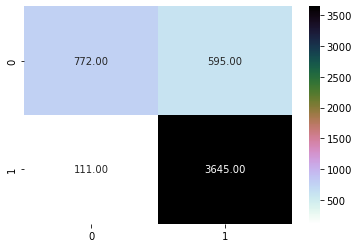

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt="0.2f",cmap="cubehelix_r")

### Applying Logistic Regression

In [44]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred1 = model1.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred1)

0.8912746437634199

### Applying Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
y_pred2 = model1.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8912746437634199

### Applying XGBoost

In [41]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred3 = model1.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred3)

0.8912746437634199

## Pipeline

In [45]:
from sklearn.pipeline import Pipeline
pipe = []
pipe.append(('tv',TfidfVectorizer()))
pipe.append(('lr',LogisticRegression()))

In [46]:
pipe


[('tv', TfidfVectorizer()), ('lr', LogisticRegression())]

In [47]:
models =Pipeline(pipe) 

In [48]:
models

Pipeline(steps=[('tv', TfidfVectorizer()), ('lr', LogisticRegression())])

In [49]:
models.fit(x,y)

Pipeline(steps=[('tv', TfidfVectorizer()), ('lr', LogisticRegression())])

## Model Saving

In [50]:
import pickle
f1 = open(file="Hotel_model_neattext.pkl",mode="wb")
pickle.dump(models,f1)
f1.close()
